In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [5]:
# find the best k using elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(wcss)

[269981.28]
[269981.28, 183653.32894736843]
[269981.28, 183653.32894736843, 106348.37306211122]
[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195]
[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337]
[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 40825.16946386947]
[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 40825.16946386947, 33642.57922077923]
[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 40825.16946386947, 33642.57922077923, 26686.83778518779]
[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 40825.16946386947, 33642.57922077923, 26686.83778518779, 24766.471609793443]
[269981.28, 183653.32894736843, 106348.37306211122, 73880.64496247195, 44448.4554479337, 40825.16946386947, 33642.57922077923, 26686.83778518779, 24766.471609793443, 23103.122085983916]


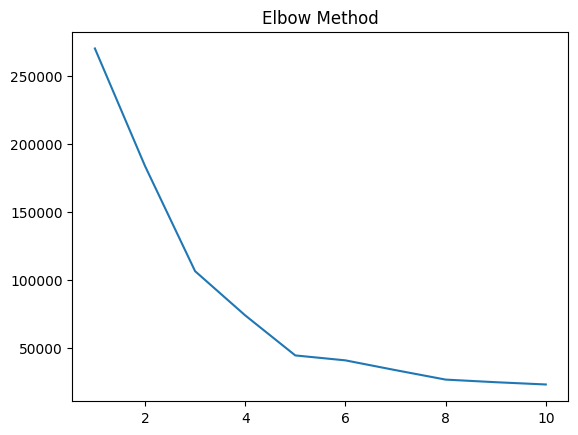

In [6]:
# plot graph for Elbow method
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.show()

In [7]:
# k-means with best k=3
k_means=KMeans(n_clusters=3, init='k-means++',random_state=42)
df['Cluster']=k_means.fit_predict(x)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [8]:
print(df.tail())

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
195        1  
196        0  
197        1  
198        0  
199        1  


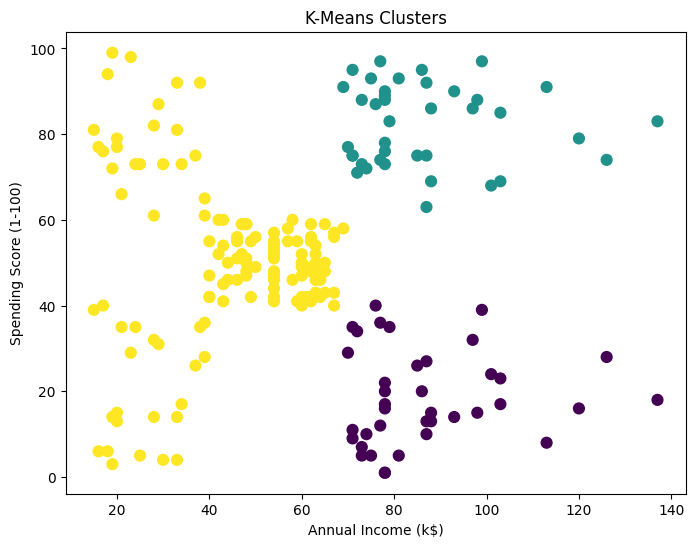

In [15]:
# scatter plot for clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit KMeans
k_means = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = k_means.fit_predict(x)

# Scatter plot for DataFrame
plt.figure(figsize=(8,6))
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=labels, cmap='viridis', s=60)

plt.title("K-Means Clusters")
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])

plt.show()